<a href="https://colab.research.google.com/github/kcj4800/Tensorflow_practice/blob/main/Function_API%EB%A1%9C_%EB%A7%8C%EB%93%9C%EB%8A%94_%EB%AA%A8%EB%8D%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_9 (Dense)             (None, 128)               100480    
                                                                 
 dense_10 (Dense)            (None, 256)               33024     
                                                                 
 dense_11 (Dense)            (None, 10)                2570      
                                                                 
Total params: 136,074
Trainable params: 136,074
Non-trainable params: 0
_________________________________________________________________


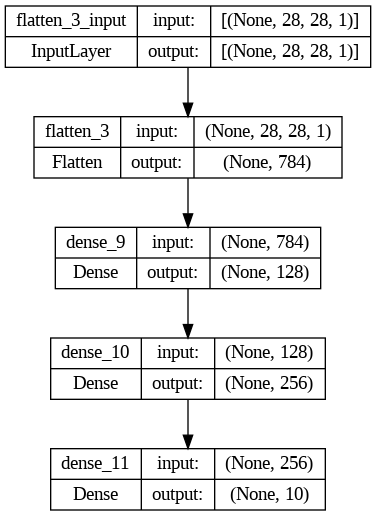

In [5]:
import tensorflow as tf

import numpy as np
import matplotlib.pyplot as plt

fashion_mnist = tf.keras.datasets.fashion_mnist
(trainX, trainY), (testX, testY) = tf.keras.datasets.fashion_mnist.load_data()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankleboot']

trainX = trainX / 255.0
testX = testX / 255.0

trainX = trainX.reshape(trainX.shape[0], trainX.shape[1], trainX.shape[2], 1)
testX = testX.reshape(testX.shape[0], testX.shape[1], testX.shape[2], 1)

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28, 28, 1)),
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dense(256, activation = 'relu'),
    tf.keras.layers.Dense(10, activation =  'softmax'),
])

model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model.summary()

# 모델을 실행시켜주는 코드 (keras 내의 유틸 함수 중 하나)
from tensorflow.keras.utils import plot_model

plot_model(model, to_file = 'model.png', show_shapes = True, show_layer_names = True)

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 28, 28)]     0           []                               
                                                                                                  
 flatten_10 (Flatten)           (None, 784)          0           ['input_4[0][0]']                
                                                                                                  
 dense_18 (Dense)               (None, 784)          615440      ['flatten_10[0][0]']             
                                                                                                  
 reshape_3 (Reshape)            (None, 28, 28)       0           ['dense_18[0][0]']               
                                                                                            

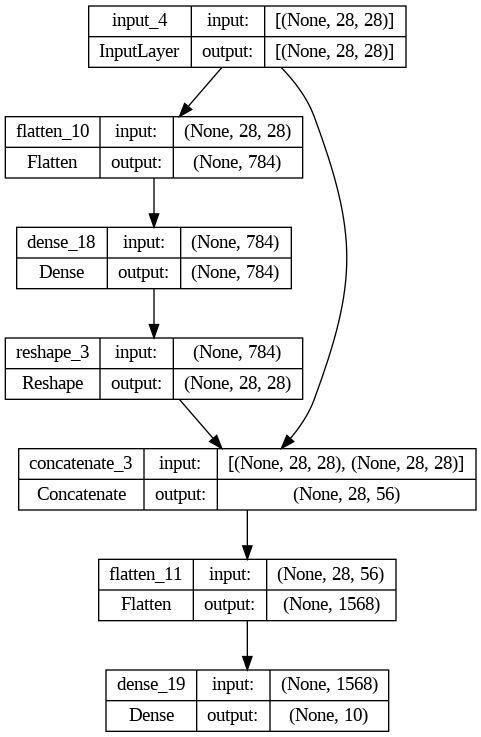

In [9]:

input1 = tf.keras.layers.Input(shape = [28, 28]) # 데이터를 넣는 임시 레이어
flatten1 = tf.keras.layers.Flatten()(input1)
dense1 = tf.keras.layers.Dense(28*28, activation = 'relu')(flatten1)

# [1, 2, 3, 4, 5, 6] => [1, 2, 3],[4, 5, 6] : 쭉 나열되어있는 1차원 레이어를 2차원, 3차원 레이어로 reshape 해준다.
# 이전의 dense1레이어의 노드 갯수가 28*28개 있어야 ((28,28))의 레이어로 reshape 가능하다.
reshape1 = tf.keras.layers.Reshape((28, 28))(dense1)

# 두 개의 레이어를 합쳐준다.
# 순차적으로 변형만을 너무 많이 하다보면 원본데이터와 많이 동떨어진 형태가 될 수 있으므로, 첫레이어를 복사해서 중간 중간 합쳐준다.
concat1 = tf.keras.layers.Concatenate()([input1, reshape1])
flatten2 = tf.keras.layers.Flatten()(concat1)
output = tf.keras.layers.Dense(10, activation = 'softmax')(flatten2)

# Model(인 풋 레이어 변수명, 아웃 풋 레이어 변수명)이라는 함수에 
model = tf.keras.Model(input1, output)

model.summary()
# plot_model(model, to_file = 'model.png', show_shapes = True, show_layer_names = True)
plot_model(model, to_file = 'model.png', show_shapes = True, show_layer_names = True)
# model.compile(loss = 'sparse_categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])
# model.fit(trainX, trainY, validation_data = (testX, testY), epochs = 3)


